In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('downloads/IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [4]:
sentiments = data['sentiment']
sentiments = sentiments.replace({"positive": 1, "negative": 0})

2.Define a text preprocessing pipeline, i.e., stopword removal, lower casing, punctuation removal etc
1.Define your own train-val-test split. Ratio : (train: 18: test : 5 , val : 2)

In [5]:
import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords 
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = text.replace('x', '')
    text = text.replace('\d+', '')
    
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

reviews =data['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
X_train, X_test, y_train, y_test = train_test_split(reviews,sentiments,test_size=0.2, random_state=1)
X_train,X_val, y_train, y_val =train_test_split(X_train, y_train,test_size=0.1, random_state=1 )

In [7]:
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)

(10000,)
(36000,)
(4000,)


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

Developing ML methods:
1. Model a Naive Bayes classifier.
a. Count vectorizer features.
b. TF-IDF features.


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      5044
           1       0.87      0.84      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy : 0.8616


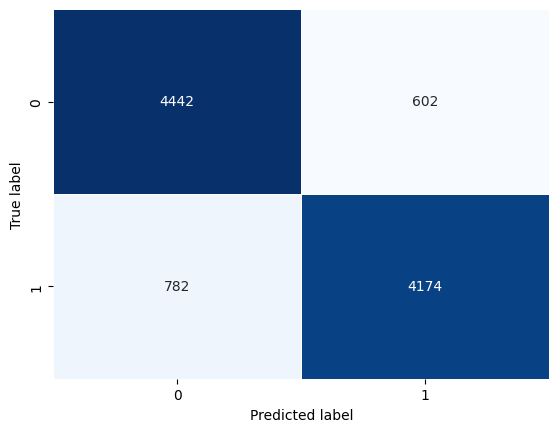

In [10]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
clf = MultinomialNB()
clf.fit(X_train_count, y_train)

X_test_count = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_count)
accuracy = accuracy_score(y_test, y_pred)
c_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [11]:
print(accuracy*100)

86.16


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5044
           1       0.87      0.86      0.87      4956

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Accuracy : 0.8691


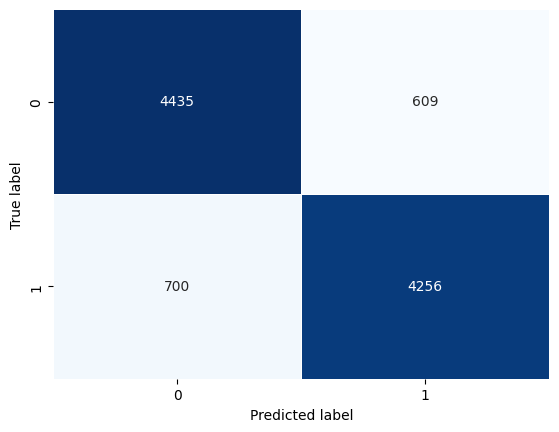

In [12]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

X_test_tfidf = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred)
c_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [13]:
print(accuracy_tfidf*100)

86.91


3. ii ) Model a decision tree with TF-IDF features

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      5044
           1       0.71      0.72      0.71      4956

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

Accuracy : 0.7148


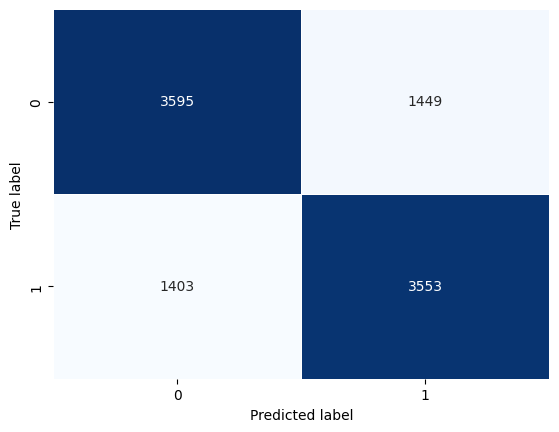

In [14]:
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)
accuracy_dec = accuracy_score(y_test, y_pred)
c_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [15]:
print(accuracy_dec*100)

71.48


4. Developing Deep neural networks:

    a. RNN model.
    
      1. 64 hidden-vector dimension.


In [16]:
# helps in model building
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import InputLayer
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [18]:
# helps in text preprocessing
from keras.utils import pad_sequences
#from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(X_train)

In [19]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
encoded_val = t.texts_to_sequences(X_val)
print(encoded_train[0:2])

KeyboardInterrupt: 

In [ ]:
max_length = 128
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
padded_val = pad_sequences(encoded_val, maxlen=max_length, padding='post')
print(padded_train)

[[1148 3671 9852 ...    0    0    0]
 [   5  369  596 ...   42   54  809]
 [  20  882    2 ...    0    0    0]
 ...
 [ 259 1794   39 ...    0    0    0]
 [   6   84   27 ...    0    0    0]
 [ 110 1339 5355 ...    0    0    0]]


In [ ]:
vocab_size = len(t.word_index) + 1
# define the model
RNNModel64 = Sequential(name="SimpleRNNModel64")
RNNModel64.add(Embedding(vocab_size, 64, input_length=max_length))
RNNModel64.add(SimpleRNN(64, return_sequences=False))
RNNModel64.add(Dense(64, activation='relu'))
RNNModel64.add(keras.layers.Dropout(0.5))
RNNModel64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(1e-5)

# compile the model
RNNModel64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(RNNModel64.summary())

Model: "SimpleRNNModel64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 64, 64)            8900032   
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,912,513
Trainable params: 8,912,513
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
def plot_training_graph(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/100
1125/1125 [==============================] - 115s 101ms/step - loss: 2.5126 - accuracy: 0.5008 - val_loss: 0.7675 - val_accuracy: 0.5063
Epoch 2/100
1125/1125 [==============================] - 113s 101ms/step - loss: 0.9826 - accuracy: 0.5072 - val_loss: 0.7182 - val_accuracy: 0.5002
Epoch 3/100
1125/1125 [==============================] - 118s 105ms/step - loss: 0.9051 - accuracy: 0.5122 - val_loss: 0.7187 - val_accuracy: 0.5038
Epoch 4/100
1125/1125 [==============================] - 144s 128ms/step - loss: 0.8719 - accuracy: 0.5154 - val_loss: 0.7069 - val_accuracy: 0.5060
Epoch 5/100
1125/1125 [==============================] - 151s 134ms/step - loss: 0.8503 - accuracy: 0.5225 - val_loss: 0.7049 - val_accuracy: 0.5085
Epoch 6/100
1125/1125 [==============================] - 115s 102ms/step - loss: 0.8081 - accuracy: 0.5312 - val_loss: 0.7008 - val_accuracy: 0.5157
Epoch 7/100
1125/1125 [==============================] - 114s 101ms/step - loss: 0.7954 - accuracy: 0.5314

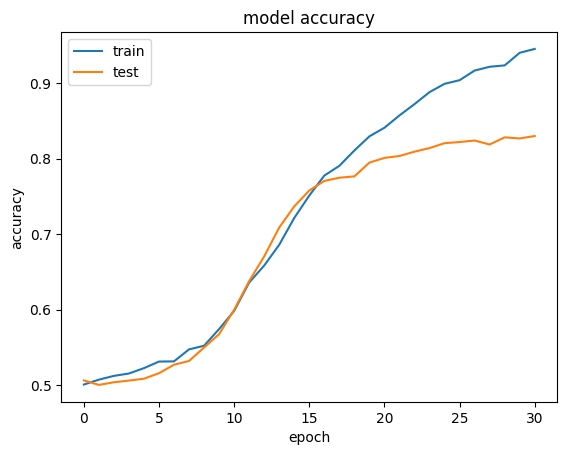

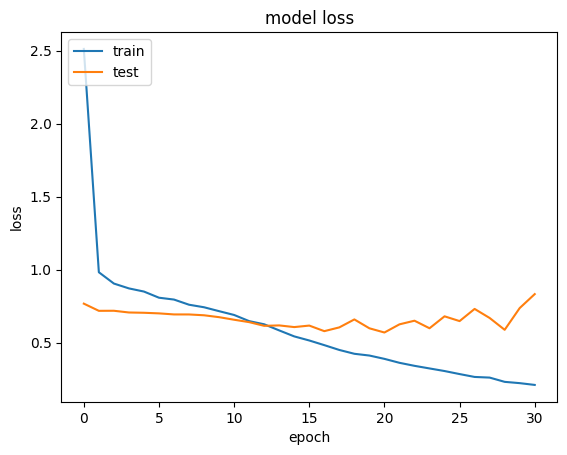

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = RNNModel64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [ ]:
preds_rnn_64 = (RNNModel64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 3ms/step


In [ ]:
c_report(y_test, preds_rnn_64)

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      5044
           1       0.83      0.85      0.84      4956

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Accuracy : 0.8398


0.8398

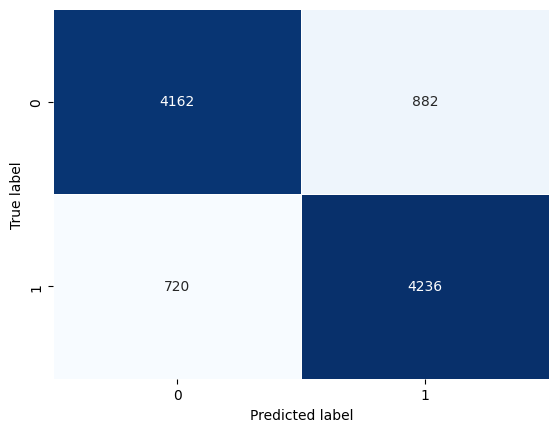

In [ ]:
plot_confusion_matrix(y_test, preds_rnn_64)

4. Developing Deep neural networks:

    a. RNN model.
    
      2. 256 hidden-vector dimension.


In [ ]:
# define the model
RNNModel256 = Sequential(name="SimpleRNNModel256")
RNNModel256.add(Embedding(vocab_size, 256, input_length=max_length))
RNNModel256.add(SimpleRNN(256, return_sequences=False))
RNNModel256.add(Dense(256, activation='relu'))
RNNModel256.add(keras.layers.Dropout(0.5))
RNNModel256.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
RNNModel256.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(RNNModel256.summary())

Model: "SimpleRNNModel256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 35,797,505
Trainable params: 35,797,505
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
1125/1125 [==============================] - 514s 456ms/step - loss: 1.8721 - accuracy: 0.5036 - val_loss: 0.7164 - val_accuracy: 0.5128
Epoch 2/100
1125/1125 [==============================] - 451s 401ms/step - loss: 0.9338 - accuracy: 0.5159 - val_loss: 0.7018 - val_accuracy: 0.5310
Epoch 3/100
1125/1125 [==============================] - 475s 422ms/step - loss: 0.8536 - accuracy: 0.5385 - val_loss: 0.6928 - val_accuracy: 0.5445
Epoch 4/100
1125/1125 [==============================] - 476s 423ms/step - loss: 0.7736 - accuracy: 0.5683 - val_loss: 0.6766 - val_accuracy: 0.5742
Epoch 5/100
1125/1125 [==============================] - 481s 427ms/step - loss: 0.7163 - accuracy: 0.6034 - val_loss: 0.6616 - val_accuracy: 0.6028
Epoch 6/100
1125/1125 [==============================] - 419s 372ms/step - loss: 0.6339 - accuracy: 0.6693 - val_loss: 0.5937 - val_accuracy: 0.7048
Epoch 7/100
1125/1125 [==============================] - 472s 420ms/step - loss: 0.5759 - accuracy: 0.7365

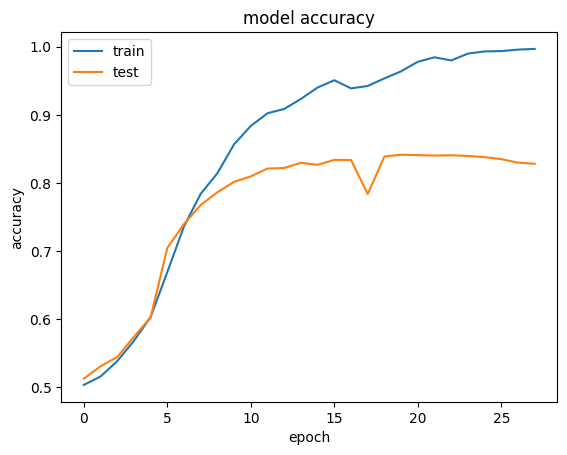

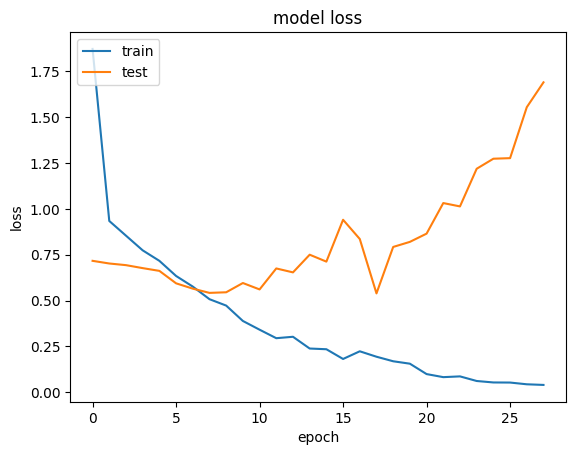

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = RNNModel256.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [ ]:
preds_rnn_256 = (RNNModel256.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 4s 11ms/step


In [ ]:
c_report(y_test, preds_rnn_256)

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5044
           1       0.82      0.85      0.83      4956

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Accuracy : 0.8338


0.8338

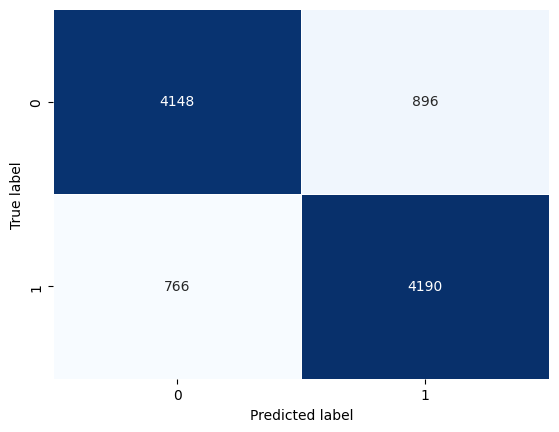

In [ ]:
plot_confusion_matrix(y_test, preds_rnn_256)

4. Developing Deep neural networks:

    b. 1-layer LSTM model


In [ ]:
# define the model
SingleLSTMLayer64 = Sequential(name="SingleLSTMLayer64")
SingleLSTMLayer64.add(Embedding(vocab_size, 256, input_length=max_length))
SingleLSTMLayer64.add(LSTM(64, return_sequences=False))
SingleLSTMLayer64.add(Dense(64, activation='relu'))
SingleLSTMLayer64.add(keras.layers.Dropout(0.5))
SingleLSTMLayer64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
SingleLSTMLayer64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(SingleLSTMLayer64.summary())

Model: "SingleLSTMLayer64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 35,686,529
Trainable params: 35,686,529
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
1125/1125 [==============================] - 485s 430ms/step - loss: 2.7373 - accuracy: 0.4984 - val_loss: 1.6726 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 504s 448ms/step - loss: 1.6927 - accuracy: 0.4984 - val_loss: 1.4675 - val_accuracy: 0.5030
Epoch 3/100
1125/1125 [==============================] - 494s 439ms/step - loss: 1.4390 - accuracy: 0.4984 - val_loss: 1.2839 - val_accuracy: 0.5030
Epoch 4/100
1125/1125 [==============================] - 498s 443ms/step - loss: 1.2266 - accuracy: 0.4987 - val_loss: 1.0605 - val_accuracy: 0.5030
Epoch 5/100
1125/1125 [==============================] - 501s 445ms/step - loss: 0.9420 - accuracy: 0.5040 - val_loss: 0.7310 - val_accuracy: 0.5155
Epoch 6/100
1125/1125 [==============================] - 513s 456ms/step - loss: 0.7070 - accuracy: 0.5661 - val_loss: 0.6232 - val_accuracy: 0.7175
Epoch 7/100
1125/1125 [==============================] - 496s 441ms/step - loss: 0.5935 - accuracy: 0.6987

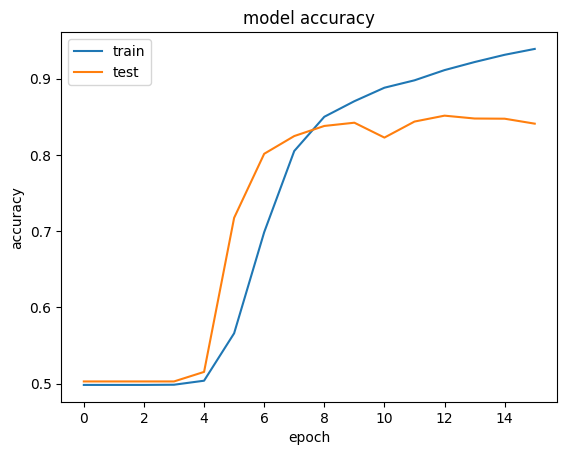

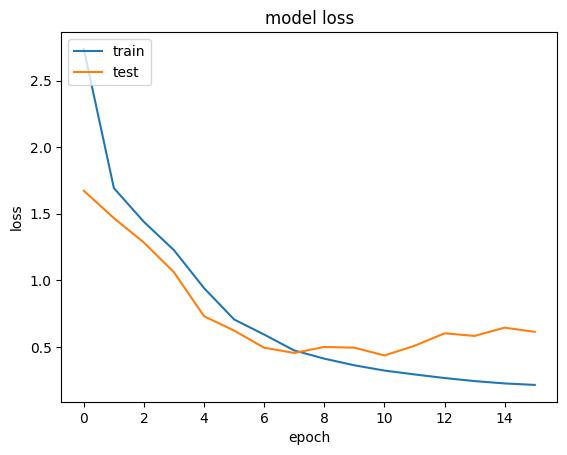

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = SingleLSTMLayer64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [ ]:
preds_1_lstm_64 = (SingleLSTMLayer64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 8s 23ms/step


In [ ]:
c_report(y_test, preds_1_lstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      5044
           1       0.89      0.77      0.83      4956

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

Accuracy : 0.8427


0.8427

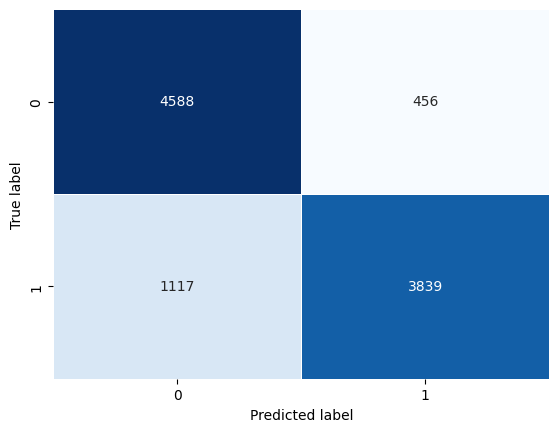

In [ ]:
plot_confusion_matrix(y_test, preds_1_lstm_64)

4. Developing Deep neural networks:

    c. 2-layer LSTM model


In [ ]:
# define the model
DoubleLSTMLayer64 = Sequential(name="DoubleLSTMLayer64")
DoubleLSTMLayer64.add(Embedding(vocab_size, 256, input_length=max_length))
DoubleLSTMLayer64.add(LSTM(64, return_sequences=True))
DoubleLSTMLayer64.add(LSTM(32, return_sequences=False))
DoubleLSTMLayer64.add(Dense(32, activation='relu'))
DoubleLSTMLayer64.add(keras.layers.Dropout(0.5))
DoubleLSTMLayer64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
DoubleLSTMLayer64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(DoubleLSTMLayer64.summary())

Model: "DoubleLSTMLayer64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 lstm_4 (LSTM)               (None, 64, 64)            82176     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 35,695,809
Trainable params: 35,695

Epoch 1/100
1125/1125 [==============================] - 521s 458ms/step - loss: 2.5319 - accuracy: 0.4984 - val_loss: 1.6423 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 509s 453ms/step - loss: 1.5724 - accuracy: 0.4984 - val_loss: 1.3608 - val_accuracy: 0.5030
Epoch 3/100
1125/1125 [==============================] - 504s 448ms/step - loss: 1.2891 - accuracy: 0.4984 - val_loss: 1.1185 - val_accuracy: 0.5030
Epoch 4/100
1125/1125 [==============================] - 498s 443ms/step - loss: 1.0293 - accuracy: 0.4991 - val_loss: 0.8483 - val_accuracy: 0.5030
Epoch 5/100
1125/1125 [==============================] - 508s 451ms/step - loss: 0.7897 - accuracy: 0.5174 - val_loss: 0.6778 - val_accuracy: 0.5540
Epoch 6/100
1125/1125 [==============================] - 501s 445ms/step - loss: 0.6969 - accuracy: 0.5762 - val_loss: 0.6184 - val_accuracy: 0.7312
Epoch 7/100
1125/1125 [==============================] - 507s 451ms/step - loss: 0.6113 - accuracy: 0.6751

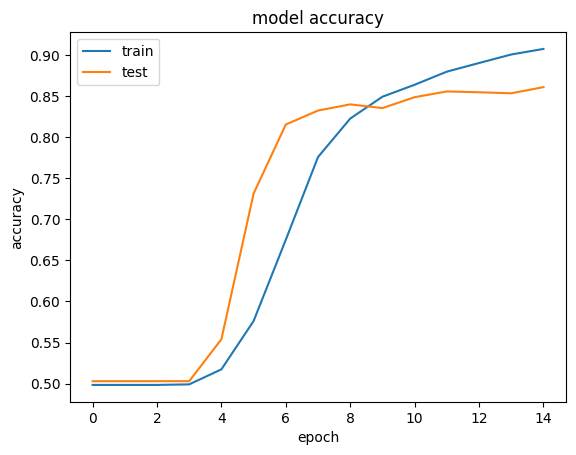

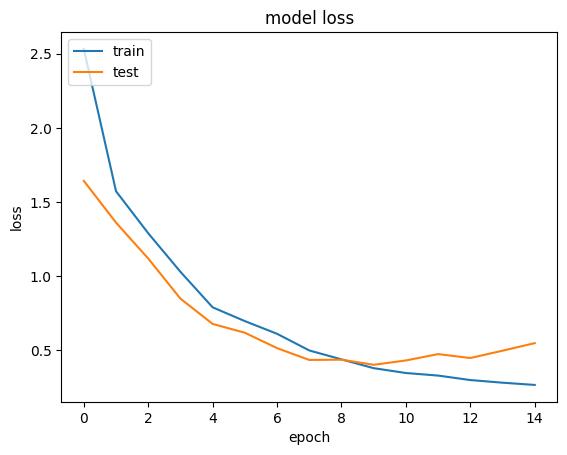

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = DoubleLSTMLayer64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [ ]:
preds_2_lstm_64 = (DoubleLSTMLayer64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 5s 14ms/step


In [ ]:
c_report(y_test, preds_2_lstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5044
           1       0.85      0.86      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy : 0.8579


0.8579

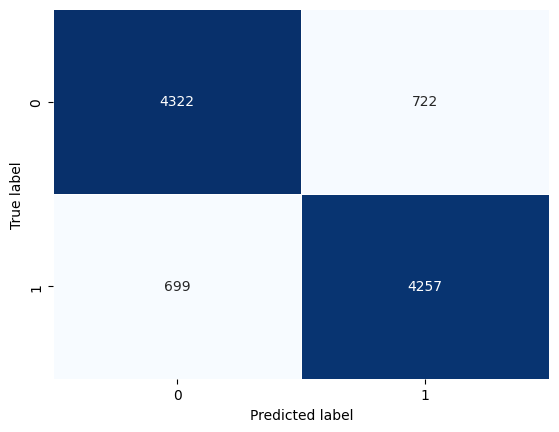

In [ ]:
plot_confusion_matrix(y_test, preds_2_lstm_64)

4. Developing Deep neural networks:

    d. 1-layer Bi-LSTM model


In [ ]:
# define the model
SingleBiLSTMModel = Sequential(name="SingleBiLSTMModel")
SingleBiLSTMModel.add(Embedding(vocab_size, 256, input_length=max_length))
SingleBiLSTMModel.add(Bidirectional(LSTM(64, return_sequences=False)))
SingleBiLSTMModel.add(Dense(32, activation='relu'))
SingleBiLSTMModel.add(keras.layers.Dropout(0.5))
SingleBiLSTMModel.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
SingleBiLSTMModel.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(SingleBiLSTMModel.summary())

Model: "SingleBiLSTMModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_26 (Dense)            (None, 32)                4128      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 35,768,641
Trainable params: 35,768,641
Non-trainable params: 0
_____________________________________

Epoch 1/100
1125/1125 [==============================] - 500s 442ms/step - loss: 3.2358 - accuracy: 0.4984 - val_loss: 1.6910 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 452s 402ms/step - loss: 1.8111 - accuracy: 0.4984 - val_loss: 1.4645 - val_accuracy: 0.5030
Epoch 3/100
1125/1125 [==============================] - 449s 399ms/step - loss: 1.5207 - accuracy: 0.4984 - val_loss: 1.3288 - val_accuracy: 0.5030
Epoch 4/100
1125/1125 [==============================] - 466s 414ms/step - loss: 1.3407 - accuracy: 0.4984 - val_loss: 1.2011 - val_accuracy: 0.5030
Epoch 5/100
1125/1125 [==============================] - 441s 392ms/step - loss: 1.1920 - accuracy: 0.4984 - val_loss: 1.0829 - val_accuracy: 0.5030
Epoch 6/100
1125/1125 [==============================] - 440s 391ms/step - loss: 1.0679 - accuracy: 0.4999 - val_loss: 0.9584 - val_accuracy: 0.5030
Epoch 7/100
1125/1125 [==============================] - 439s 390ms/step - loss: 0.9344 - accuracy: 0.5044

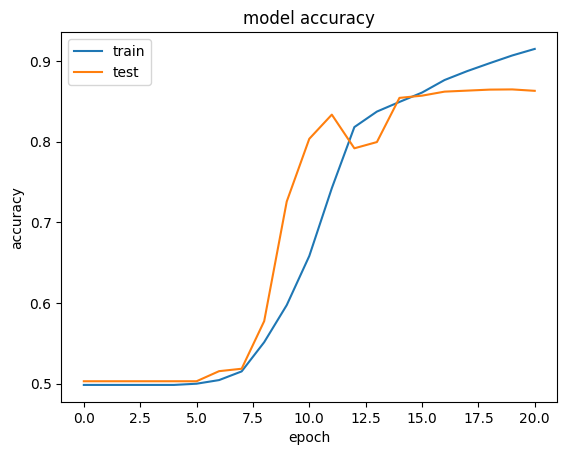

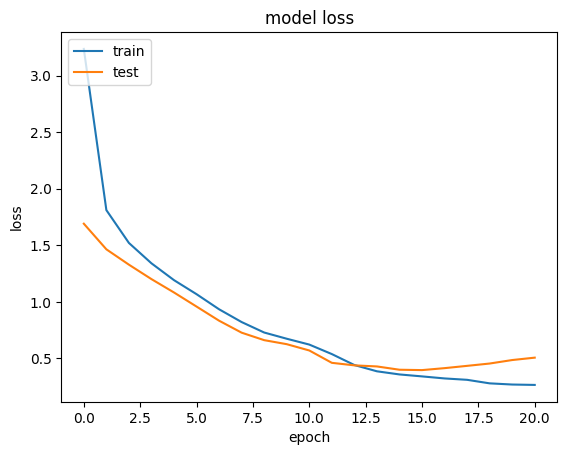

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = SingleBiLSTMModel.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [ ]:
preds_bilstm_64 = (SingleBiLSTMModel.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 5s 15ms/step


In [ ]:
c_report(y_test, preds_bilstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      5044
           1       0.87      0.86      0.86      4956

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Accuracy : 0.8667


0.8667

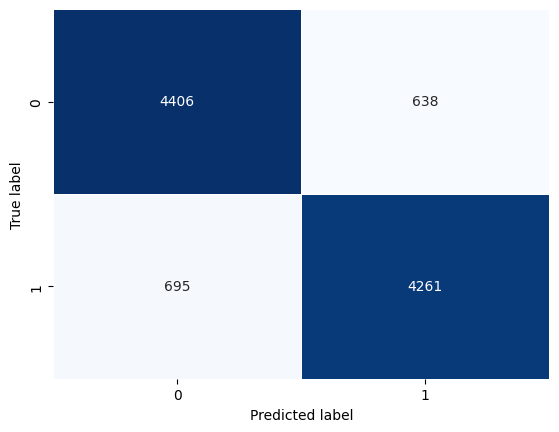

In [ ]:
plot_confusion_matrix(y_test, preds_bilstm_64)

4. Developing Deep neural networks:

    e. Use Google word2vec embeddings as input embedding to model in 4.d. [Compare the performance 4.e vs 4.d]


In [ ]:
from gensim.models import Word2Vec

Embedding_dimensions = 256

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 38416


In [ ]:
vocab_size = len(t.word_index) + 1
embedding_matrix = np.zeros((vocab_size, Embedding_dimensions))

for word, token in t.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (139063, 256)


In [ ]:
#max_length = 64

# define the model
BiLSTMLayerWithWord2Vec = Sequential(name="BiLSTMLayerWithWord2Vec")
BiLSTMLayerWithWord2Vec.add(Embedding(vocab_size, 256, input_length=max_length,
                                      weights=[embedding_matrix],trainable = False))
#BiLSTMLayerWithWord2Vec.add(Bidirectional(LSTM(128, dropout=0.3, return_sequences=True)))
BiLSTMLayerWithWord2Vec.add(Bidirectional(LSTM(64, dropout=0.3, return_sequences=False)))
BiLSTMLayerWithWord2Vec.add(Dense(32, activation='relu'))
BiLSTMLayerWithWord2Vec.add(Dropout(0.2))
BiLSTMLayerWithWord2Vec.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
BiLSTMLayerWithWord2Vec.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(BiLSTMLayerWithWord2Vec.summary())

Model: "BiLSTMLayerWithWord2Vec"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 128, 256)          35600128  
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 35,768,641
Trainable params: 168,513
Non-trainable params: 35,600,128
_________________________

Epoch 1/100
1125/1125 [==============================] - 162s 140ms/step - loss: 3.8885 - accuracy: 0.4994 - val_loss: 2.1759 - val_accuracy: 0.5005
Epoch 2/100
1125/1125 [==============================] - 140s 125ms/step - loss: 2.3539 - accuracy: 0.4985 - val_loss: 1.3062 - val_accuracy: 0.4975
Epoch 3/100
1125/1125 [==============================] - 141s 125ms/step - loss: 1.7592 - accuracy: 0.4958 - val_loss: 1.0192 - val_accuracy: 0.4990
Epoch 4/100
1125/1125 [==============================] - 140s 125ms/step - loss: 1.4376 - accuracy: 0.4996 - val_loss: 0.9283 - val_accuracy: 0.5027
Epoch 5/100
1125/1125 [==============================] - 144s 128ms/step - loss: 1.2997 - accuracy: 0.5022 - val_loss: 0.8841 - val_accuracy: 0.5070
Epoch 6/100
1125/1125 [==============================] - 137s 121ms/step - loss: 1.1784 - accuracy: 0.5095 - val_loss: 0.8238 - val_accuracy: 0.5160
Epoch 7/100
1125/1125 [==============================] - 138s 123ms/step - loss: 1.0865 - accuracy: 0.5173

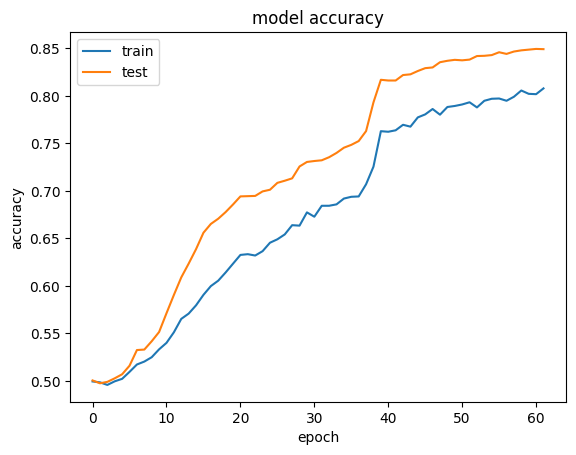

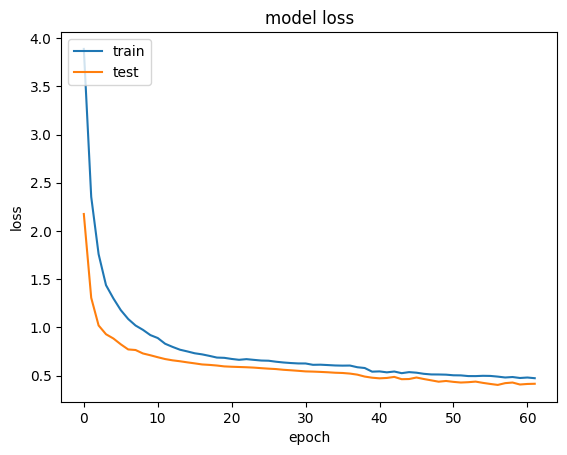

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = BiLSTMLayerWithWord2Vec.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [ ]:
preds_2_lstm_64_w2v = (BiLSTMLayerWithWord2Vec.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 32s 96ms/step


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      5044
           1       0.84      0.84      0.84      4956

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Accuracy : 0.8439


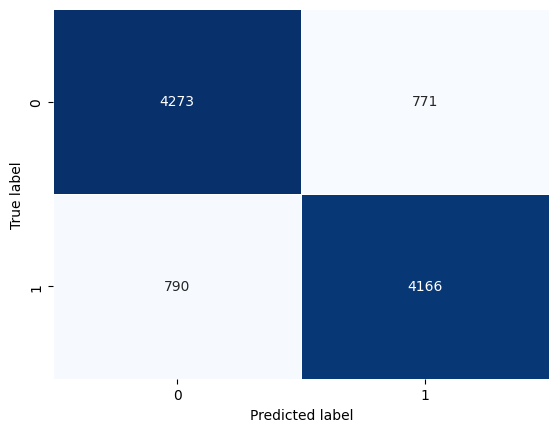

In [ ]:
c_report(y_test, preds_2_lstm_64_w2v)
plot_confusion_matrix(y_test, preds_2_lstm_64_w2v)

Use Glove embeddings as input embedding to model in 4.d. [Compare the performance

In [ ]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.manifold import TSNE

In [ ]:
embeddings_index = dict()
#f = open('glove.6B.50d.txt')
embeddings_index = {}
with open('glove.6B.50d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(['data'])

sequences = tokenizer.texts_to_sequences(['data'])
data = pad_sequences(sequences, maxlen=50)

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocabulary_size, 50))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 50, input_length=50, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.layers import Embedding, Bidirectional, LSTM, Dense
# Tokenize input sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

# Pad sequences to a fixed length
max_len = 128
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Create input embedding matrix using GloVe embeddings
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Define 1-layer Bi-LSTM model with GloVe input embeddings
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(padded_sequences, y_train, epochs=10, batch_size=32)

Epoch 1/10
1125/1125 [==============================] - 62s 53ms/step - loss: 0.5142 - accuracy: 0.7524
Epoch 2/10
1125/1125 [==============================] - 63s 56ms/step - loss: 0.4158 - accuracy: 0.8123
Epoch 3/10
1125/1125 [==============================] - 58s 52ms/step - loss: 0.3757 - accuracy: 0.8344
Epoch 4/10
1125/1125 [==============================] - 57s 51ms/step - loss: 0.3497 - accuracy: 0.8491
Epoch 5/10
1125/1125 [==============================] - 51s 45ms/step - loss: 0.3245 - accuracy: 0.8606
Epoch 6/10
1125/1125 [==============================] - 52s 46ms/step - loss: 0.3031 - accuracy: 0.8701
Epoch 7/10
1125/1125 [==============================] - 51s 46ms/step - loss: 0.2819 - accuracy: 0.8824
Epoch 8/10
1125/1125 [==============================] - 52s 46ms/step - loss: 0.2656 - accuracy: 0.8892
Epoch 9/10
1125/1125 [==============================] - 51s 46ms/step - loss: 0.2448 - accuracy: 0.8985
Epoch 10/10
1125/1125 [==============================] - 52s 46m

In [ ]:
word_list = []
for word, i in tokenizer.word_index.items():
    word_list.append(word)

In [ ]:
def plot_words(data, start, stop, step):
    trace = go.Scatter(
        x = data[start:stop:step,0], 
        y = data[start:stop:step, 1],
        mode = 'markers',
        text= word_list[start:stop:step]
    )
    layout = dict(title= 'glove.50 vs IMDB',
                  yaxis = dict(title='glove.50'),
                  xaxis = dict(title='IMDB'),
                  hovermode= 'closest')
    fig = dict(data = [trace], layout= layout)
    py.iplot(fig)

In [ ]:
glove_emds = model_glove.layers[0].get_weights()[0]

In [ ]:
glove_tsne_embds = TSNE(n_components=2).fit_transform(glove_emds)

c:\Users\Saurav APDCL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\Saurav APDCL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
number_of_words = 2000
plot_words(glove_tsne_embds, 0, number_of_words, 1)

In [ ]:
preds_2_glov_64 = (model.predict(padded_test) > 0.5).astype("int32")

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5044
           1       0.85      0.87      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy : 0.8595


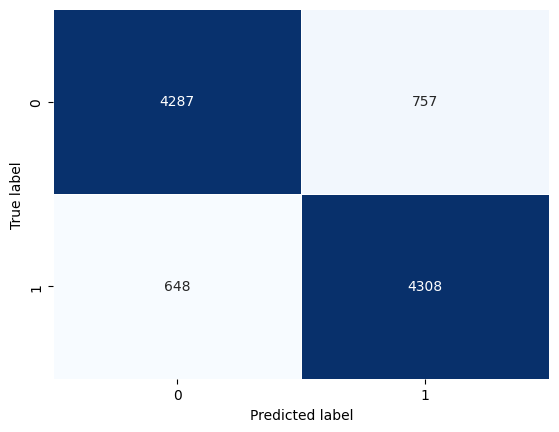

In [ ]:
c_report(y_test, preds_2_glov_64)
plot_confusion_matrix(y_test, preds_2_glov_64)